# Portfolio Task 6: Conjoint Analysis Study

## Introduction

This report presents a conjoint analysis study to determine consumer preferences for a new mobile phone.

By evaluating key product attributes such as price, battery life, number of cameras, and storage capacity, we aim to identify the features that influence purchasing decisions. 

Ten respondents ranked different phone configurations, and the data was analysed using linear regression to calculate utility values for each attribute level. The results provide insights into consumer priorities and highlight areas for potential product improvement.

## Tasks

Carry out a conjoint analysis study for the launch of a new mobile phone:

- Identify at least four different factors with a minimum of two levels per factor (one or two of them should preferably have three or four levels each).
- Create all different combinations of products and ask 10 of family member, friends or colleagues to rank them according to their preference with one being the most sought-after product. Perform conjoint analysis using linear regression and calculate the utilities as well as identify levels where further work is needed.
- Produce a short report (i.e. two to three pages) outlining the steps of the conjoint analysis study.
- Present the overall utilities for each product as well as present and comment in areas where consumers' preferences change.

## Key Findings

**Price:**
- The most important attribute of the new phone that affects customer's puchasing decision is `Price`.
- As price increases, customers' perceived value steadily declines. Therefore, it is essential to balance affordable pricing with the most desirable features to align with customer preferences while maintaining profitability and competitiveness.

**Features:**
- The second-most important attribute is `Memory Storage`, the higher the storage, the higher customer's preference.
- Consumers are more willing to pay for the larger storage upgrade when moving from a mid-tier option (`256 GB`) to the highest capacity (`512 GB`). Thus, we can introduce deals or payment plans for the `512 GB` versions to encourage customers to opt for the larger capacity.
- As larger screens do not significantly enhance customer's interest, position the large-screen product as a premium or niche offering, targeting specific customer segments that value larger displays instead of the majority of customers.

## Recommendations

Based on the utilities derived from the conjoint analysis, the proposed product pricing strategy aims to maximise customer preference with `two product models`:

| Model         | Display Size | Number of Cameras | 128 GB  | 256 GB  | 512 GB  |
|---------------|-------------|------------------|---------|---------|---------|
| **Standard**   | 5.5 Inches  | 3                | £399    | £599    | £799    |
| **Pro**       | 6.1 Inches  | 3                |      | £799    | £999    |

- The **Standard** model is the primary version, designed to appeal to a larger customer base who prefer a portable-sized phone at a lower price. With storage options of 128 GB, 256 GB, and 512 GB, this model is expected to produce and sell more units, as the analysis shows the significant customer preference for affordability and compact size. 
- The **Pro** model aims to cater to customers seeking more larger phones, only offering 256 GB and 512 GB storage options. 
- Both versions include 3 cameras, a feature that the analysis indicates moderate customer's preference.


## The Project Directory

The Portfolio 6 Project files can be found in the Github Repository: [github.com/lamtong/portfolio6_cojoint_analysis](https://github.com/lamtong/portfolio6_cojoint_analysis)

## I. Data Pre-Processing

In [23]:
# Import packages
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import itertools
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

sys.path.append(os.path.abspath(".."))

import warnings
# Ignore FutureWarnings
warnings.filterwarnings("ignore", 
                        category = FutureWarning)  

# Ignore SettingWithCopyWarning
warnings.simplefilter(action   = "ignore", 
                      category = pd.errors.SettingWithCopyWarning) 

# Ignore UserWarning
warnings.simplefilter(action   = "ignore", 
                      category = UserWarning) 

### 1. The Product Combinations

The aim of the analysis is to investigate the customer's preference regarding the features and price of the new mobile phone. After consideration, there are `4` main factors of the product are selected for the analysis:
- **Display Size:** `5.5 inches`, `6.1 inches`
- **Number of Cameras:** `2 Cameras`, `3 Cameras`
- **Memory Storage:** `128Gb`, `256Gb`, `512Gb`
- **Price**: `£399`, `£599`, `£799`, `£999`
  
Based on the proposed factors, there are `48 combinations` of the new mobile phone in total:

In [24]:
# Product Attributes
display_inch = [5.5, 6.1]
camera       = [2, 3]
memory_gb    = [128, 256, 512]
price        = [399, 599, 799, 999]

# Generate all combinations
combinations = list(itertools.product(display_inch, camera, memory_gb, price))

# Create a DataFrame from the combinations
df_prod = pd.DataFrame(combinations, columns=['display_inch', 'camera', 'memory_gb', 'price_gbp'])

# Export the Product Combination data for Customer Survey
df_prod.to_csv('product.csv', index = False)

# The Product Combination DataFrame
df_prod

,display_inch,camera,memory_gb,price_gbp
0,5.5,2,128,399
1,5.5,2,128,599
2,5.5,2,128,799
3,5.5,2,128,999
4,5.5,2,256,399
5,5.5,2,256,599
6,5.5,2,256,799
7,5.5,2,256,999
8,5.5,2,512,399
9,5.5,2,512,599


### 2. The Customer Rate Features

**Feature Rankings of 10 Customers:**

The file *product_survey.csv* contains the collected customer's ratings for every product combination; with `1` is the `WORST` phone, and `48` is the `BEST`:

In [25]:
# The Survey Result
df_survey = pd.read_csv('product_survey.csv')
df_survey.head()

,display_inch,camera,memory_gb,price_gbp,respondent_1,respondent_2,respondent_3,respondent_4,respondent_5,respondent_6,respondent_7,respondent_8,respondent_9,respondent_10
0,5.5,2,128,399,15,40,38,16,21,30,25,21,15,16
1,5.5,2,128,599,13,24,24,17,9,14,13,3,13,18
2,5.5,2,128,799,1,11,11,10,2,7,6,8,4,6
3,5.5,2,128,999,6,1,10,1,3,1,3,1,3,4
4,5.5,2,256,399,25,42,44,29,24,32,22,22,32,26


**The Average Feature Rankings:**

Aggregate the rating data of `10` respondents by averaging them. Then based the average ranking scores, re-rank each combination `from 1 to 48` again:

In [26]:
# Ranking columns
ranking_columns = df_survey.columns[-10:]

# Average ranking score for each combination
average_ranking = df_survey[ranking_columns].mean(axis=1)

# The Ranking of each combination based on average ranking score
df_survey['average_rank'] = average_ranking.rank(method = 'max', ascending = True).astype('int64')

# The Dataframe for The Analysis
df = df_survey.iloc[:, :-11].join(df_survey.iloc[:, -1])
df.head()

,display_inch,camera,memory_gb,price_gbp,average_rank
0,5.5,2,128,399,23
1,5.5,2,128,599,13
2,5.5,2,128,799,7
3,5.5,2,128,999,1
4,5.5,2,256,399,31


## II. Data Analysis

The step-by-step process of a Conjoint Analysis study exploring customer preferences for new mobile phone features.

The analysis employs the `Rating-based method`, utilising Regression Analysis to estimate customer ratings for various product features.

### 1. Input Data

**Dummy Variables:**

To perform the Regression Analysis, it is required to create dummy variables for every feature, for an attribute with `n levels` we need to create `n-1 dummy` variables:
- **Display Size:** `X1` (display_inch_6.1)
- **Number of Cameras:** `X2` (camera_3)
- **Memory:** `X3` (memory_gb_256), `X4` (memory_gb_512)
- **Price:** `X5` (price_gbp_599), `X6` (price_gbp_799), `X7` (price_gbp_999)

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['display_inch', 'camera', 'memory_gb', 'price_gbp'],
                            drop_first = True).astype(int) # Drop one Levels for each attribute
# The Dummy Variable Dataset
df_encoded.head()

,average_rank,display_inch_6.1,camera_3,memory_gb_256,memory_gb_512,price_gbp_599,price_gbp_799,price_gbp_999
0,23,0,0,0,0,0,0,0
1,13,0,0,0,0,1,0,0
2,7,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1
4,31,0,0,1,0,0,0,0


### 2. Regression Analysis

**The Regresssion Analysis Model:**

To obtain the `Standardised Coefficients` (indicating the Relative Importance) for each dummy variable, both the Independent and Dependent variables are standardised before being applied to the Regression Model. Each standardised coefficient represents a β (BETA) weight in the predicted preference equation:

- **Dependent Variable:** Standardised `average_rank`, the standardised value of average customer's rating.
- **Independent Variables:** *constant*, and standardised values of `display_inch_6.1`, `camera_3`, `memory_gb_256`, `memory_gb_512`, `price_gbp_599`, `price_gbp_799`, `price_gbp_999`

In [28]:
# Define independent and dependent variables
X = df_encoded.drop(columns = 'average_rank')
X = sm.add_constant(X)  # Add intercept term
y = df_encoded['average_rank']

# Standardised both X and y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.to_frame())

# Fit the model
model = sm.OLS(y_scaled, X_scaled).fit()

**The Regression Model Results:**

- With the `R-Square` of `0.969`, the dummy variables (or the new phone features) are able to predict the Customers' Ranking with a `97% accuracy`.
- All the dependent variables are significant with `p-value` smaller than `0.05`, indicating a statistically meaningful impact on the model.  


In [29]:
# Summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              184.2
Date:                Tue, 18 Mar 2025   Prob (F-statistic):                    6.82e-29
Time:                        19:56:33   Log-Likelihood:                          15.404
No. Observations:                  48   AIC:                                     -16.81
Df Residuals:                      41   BIC:                                     -3.710
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\blueb\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


### 3. Intepret the Data Analysis

 **The Predicted Preference Equation**:

$$\text{Predicted Preference} = \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6 + \beta_7 X_7$$

With each `Standardised Coefficient` represents one of the β (BETA) weights in the Predicted Preference equation:

$$\text{Predicted Preference} = 0.08 \cdot X_1 + 0.22 \cdot  X_2 + 0.22 \cdot  X_3 + 0.73 \cdot  X_4 - 0.27 \cdot  X_5 - 0.55 \cdot  X_6 - 0.82  \cdot  X_7$$

**Relative Importance:**

The Average Relative Importance of the new mobile phone's attributes, including display sizes, number of cameras, storages and prices:

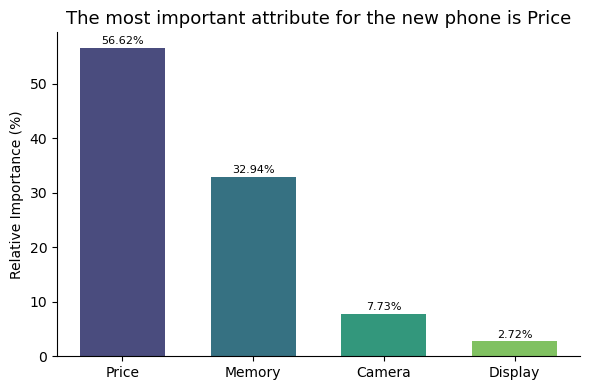

In [30]:
# Calculate relative importance as percentage
beta_coeffs = model.params[1:]

total_importance = sum(abs(beta_coeffs))
relative_importance_percentage = (abs(beta_coeffs) / total_importance) * 100

# Display results
importance_df = pd.DataFrame({
    'Feature': X.columns[1:],
    'Relative Importance (%)': relative_importance_percentage
})

# Merge price rows
price_sum = importance_df[importance_df['Feature'].str.contains('price')]['Relative Importance (%)'].sum()
price_row = pd.DataFrame({'Feature': ['Price'], 'Relative Importance (%)': [price_sum]})

# Merge memory rows
memory_sum = importance_df[importance_df['Feature'].str.contains('memory')]['Relative Importance (%)'].sum()
memory_row = pd.DataFrame({'Feature': ['Memory'], 'Relative Importance (%)': [memory_sum]})

# Rename display and camera
importance_df.loc[importance_df['Feature'] == 'display_inch_6.1', 'Feature'] = 'Display'
importance_df.loc[importance_df['Feature'] == 'camera_3', 'Feature'] = 'Camera'

# Concatenate the merged rows and the rest of the dataframe (excluding price and memory rows)
importance_df = pd.concat([importance_df[~importance_df['Feature'].str.contains('price') &
                                         ~importance_df['Feature'].str.contains('memory')], 
                price_row, memory_row], ignore_index=True)

# Descendingly sort
importance_df = importance_df.sort_values(by='Relative Importance (%)', ascending=False)

# Create a bar plot
plt.figure(figsize  = (6, 4))
ax = sns.barplot(x      = 'Feature',
                y       = 'Relative Importance (%)', 
                data    = importance_df, 
                palette ='viridis',
                width   = 0.65)

# Set plot title and labels
plt.title('The most important attribute for the new phone is Price', fontsize = 13)
plt.xlabel('')
plt.ylabel('Relative Importance (%)')

# Add numbers above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize = 8, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
sns.despine()
plt.tight_layout()
plt.show()

It is found that:
- On average, the most important attribute for the new phone is its `Price`. With `57%` of average customer's buying decision depends on the `Price`. This is reasonable as price is the main concern when purchasing a new phone.
- Following `Price`, the second-most mportant attribute for the new phone is its `Memory Storage`, with `33%` of importance.
- Conversely, only `2.7%` of average customer's buying decision depends on the `Display Size`, making this the least importance feature to the customers.

In [ ]:
#  ==== Utility of each feature ===

# Display
disp_ult = {'5.5' : 0, 
            '6.1' : model.params[1]}  

# Camera
cam_ult  = {'2' : 0,
            '3' : model.params[2]} 

# Memory
mem_ult  = {'128' : 0,
            '256' : model.params[3],
            '512' : model.params[4]} 

# Price
prc_ult  = {'399' : 0,
            '599' : model.params[5],
            '799' : model.params[6],
            '999' : model.params[7]} 

ult = {"Display (Inches)" : disp_ult,
       "Memory (Gb)"      : mem_ult,
       "Camera"           : cam_ult,
       "Price (GBP)"      : prc_ult}

df_dict = {}  # Dictionary to store Ultilities

for u, data in ult.items():  
    series     = pd.Series(data) 
    df_temp    = series.to_frame(name='Change')  
    df_temp    = df_temp.rename_axis(u)  
    df_dict[u] = df_temp 

**Examining the differences in Utilities:**

Based on the tables below, it is found that:
- **Display Size:** Moving from `5.5` to `6.1` Inches in Display size doesn't gain much ultility (`0.08`)
- **Memory:** Moving from `256` to `512` shows significant larger ultility gain of (`0.51`), comparing changes from `128` to `256` with only `0.22`
- **Number of Cameras:** Moving from `2` to `3` Cameras gain ultility of (`0.22`)
- **Price:** Increasing prices will lose utility at the same rate at around `0.27 - 0.28` each time.


In [32]:
# Differences
for i in df_dict.keys():
    df_dict[i]['Difference']  = df_dict[i]['Change'].diff()

In [33]:
# Display Sizes
df_dict['Display (Inches)']

,Change,Difference
Display (Inches),,
5.5,0.000000,NaN
6.1,0.078183,0.078183


In [34]:
# Memory
df_dict['Memory (Gb)']

,Change,Difference
Memory (Gb),,
128,0.000000,NaN
256,0.221135,0.221135
512,0.727196,0.506060


In [35]:
# Number of Cameras
df_dict['Camera']

,Change,Difference
Camera,,
2,0.000000,NaN
3,0.222521,0.222521


In [36]:
# Price
df_dict['Price (GBP)']

,Change,Difference
Price (GBP),,
399,0.000000,NaN
599,-0.265626,-0.265626
799,-0.549482,-0.283855
999,-0.815108,-0.265626


**The Table with Utility for each Feature Combination:**
- The highest ultility is the phone with maximum feature levels and lowest price, the lowest ultility is the phone with minimum feature levels and highest price, which are unrealistic:
  - **Most preferred:** The new phone combination with `highest` ultility of `1.03` has `6.1 inches` in dislay size, `512Gb` memory, `3` cameras, and selling price of `£399`
  - **Least preferred:** The new phone combination with `lowest` ultility of `-0.82` has `5.5 inches` in dislay size, `128Gb` memory, `2` cameras, and selling price of `£999`

- For each product feature combination, the higher the price, the lower the customer's preference.

In [37]:
# Create MultiIndex for rows (camera, price_gbp)
index = pd.MultiIndex.from_product(
    [cam_ult.keys(), prc_ult.keys()],
    names=["camera", "price_gbp"]
)

# Create MultiIndex for columns (display_inch, memory_gb)
columns = pd.MultiIndex.from_product(
    [disp_ult.keys(), mem_ult.keys()],
    names=["display_inch", "memory_gb"]
)

# Create an empty DataFrame with MultiIndex
df_ulti = pd.DataFrame(0.00, index=index, columns=columns)

# Fill DataFrame using nested loops
for dis in disp_ult.keys():
    for mem in mem_ult.keys():
        for cam in cam_ult.keys():      
            for pri in prc_ult.keys():
                df_ulti.loc[(cam, pri), (dis, mem)] = round((disp_ult[dis] +
                                                             mem_ult[mem] +
                                                             cam_ult[cam] +
                                                             prc_ult[pri]), 2)

# Display the DataFrame
df_ulti

display_inch       5.5               6.1            
memory_gb          128   256   512   128   256   512
camera price_gbp                                    
2      399        0.00  0.22  0.73  0.08  0.30  0.81
       599       -0.27 -0.04  0.46 -0.19  0.03  0.54
       799       -0.55 -0.33  0.18 -0.47 -0.25  0.26
       999       -0.82 -0.59 -0.09 -0.74 -0.52 -0.01
3      399        0.22  0.44  0.95  0.30  0.52  1.03
       599       -0.04  0.18  0.68  0.04  0.26  0.76
       799       -0.33 -0.11  0.40 -0.25 -0.03  0.48
       999       -0.59 -0.37  0.13 -0.51 -0.29  0.21

**The Original Ranking order of each Feature Combination:**

Similar to Utility, the highest ranked phone is the one with maximum feature levels and lowest price, the lowest ranked phone is the one with minimum feature levels and highest price.

In [38]:
# Cast the keys to numeric
disp_ult_keys = pd.Series(list(disp_ult.keys())).astype('float64')
mem_ult_keys = pd.Series(list(mem_ult.keys())).astype('int64')
cam_ult_keys = pd.Series(list(cam_ult.keys())).astype('int64')
prc_ult_keys = pd.Series(list(prc_ult.keys())).astype('int64')

# Define MultiIndex for rows and columns
index = pd.MultiIndex.from_product([cam_ult_keys, prc_ult_keys], names=['camera', 'price_gbp'])
columns = pd.MultiIndex.from_product([disp_ult_keys, mem_ult_keys], names=['display_inch', 'memory_gb'])

# Create the DataFrame with the MultiIndex
df_rank = pd.DataFrame(index=index, columns=columns)

# Populate the df_rank with average_rank values
for dis in disp_ult_keys:
    for mem in mem_ult_keys:
        for cam in cam_ult_keys:      
            for pri in prc_ult_keys:
                
                # Find the 'average_rank' in df_survey
                avg_rank = df_survey.loc[
                    (df_survey['display_inch'] == dis) & 
                    (df_survey['camera']       == cam) & 
                    (df_survey['memory_gb']    == mem) & 
                    (df_survey['price_gbp']    == pri),
                    'average_rank'
                ]
                
                if not avg_rank.empty:
                    df_rank.loc[(cam, pri), (dis, mem)] = int(avg_rank.iloc[0])
                    
# Show the Rank Dataframe
df_rank

display_inch     5.5         6.1        
memory_gb        128 256 512 128 256 512
camera price_gbp                        
2      399        23  31  46  25  35  45
       599        13  19  38  16  27  43
       799         7  11  26   8  15  34
       999         1   7  18   2   3  22
3      399        33  40  47  37  41  48
       599        24  30  42  20  32  45
       799        12  17  36  14  21  39
       999         4  10  28   5   9  29

**The Ranking orders vs. Ultilities Table:**

The table below shows how ultilities changes if the customer's rankings changes.

In [39]:
# Reset the column index to simple numeric values
df_rank_simple = df_rank.reset_index(drop=True)
df_ulti_simple = df_ulti.reset_index(drop=True)

df_rank_simple.columns = range(df_rank_simple.shape[1])
df_ulti_simple.columns = range(df_ulti_simple.shape[1])
# Flatten both DataFrames
df_rank_flat = df_rank_simple.values.flatten()
df_ulti_flat = df_ulti_simple.values.flatten()

# Combine both flattened arrays
rank_ulti_df = pd.DataFrame({
    'Rank': df_rank_flat,
    'Ultility': df_ulti_flat
})

# Sort by Rank
rank_ulti_df = rank_ulti_df.sort_values(by           = 'Rank',
                                        ascending    = False,
                                        ignore_index = True)

# Differencing
rank_ulti_df['Difference'] = rank_ulti_df['Ultility'].diff()

rank_ulti_df

,Rank,Ultility,Difference
0,48,1.03,NaN
1,47,0.95,-0.08
2,46,0.73,-0.22
3,45,0.81,0.08
4,45,0.76,-0.05
5,43,0.54,-0.22
6,42,0.68,0.14
7,41,0.52,-0.16
8,40,0.44,-0.08
9,39,0.48,0.04


**The Correlation between Ranking orders and Ultilities:**

The strong correlation of `0.983` between `Rank` and `Utility` indicates that the model effectively captures consumer preferences, confirming the reliability of the conjoint analysis results.

In [40]:
# Correlation between Rank and Ultility
correlation = rank_ulti_df['Rank'].corr(rank_ulti_df['Ultility'])

print("Correlation between Rank and Ultility:", correlation)

Correlation between Rank and Ultility: 0.9831371029071932


**Utilities graphs for each phone feature:**

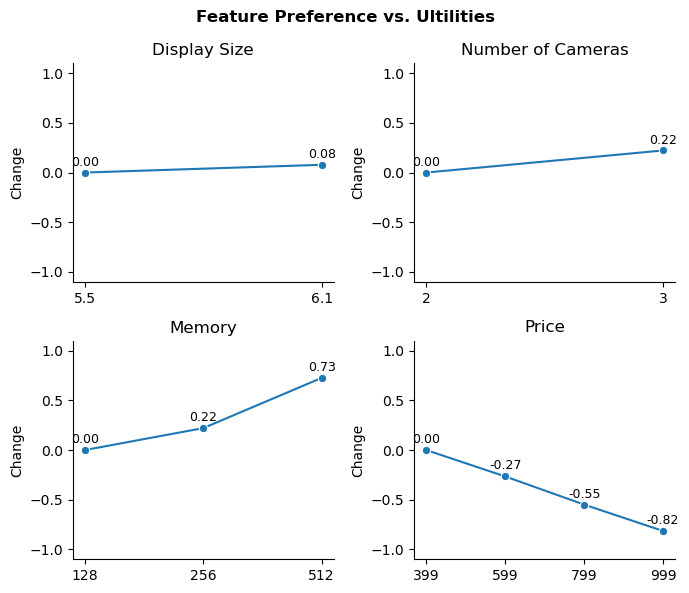

In [41]:
# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 6))  # 2 rows, 2 columns

# Plot function
def plot_with_annotations(ax, data, title):
    sns.lineplot(data   = data, 
                 x      = data.index, 
                 y      = 'Change', 
                 marker = 'o', 
                 ax     = ax)
    
    ax.set_title(title)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel('')

    # Add annotations to each point
    for x, y in zip(data.index, data['Change']):
        ax.annotate(f"{y:.2f}", (x, y), 
                    xytext     = (0, 5), 
                    textcoords = "offset points", 
                    ha         = 'center', 
                    fontsize   = 9,     
                    color      = 'black')

# First plot: Display Size
plot_with_annotations(axes[0, 0], df_dict['Display (Inches)'], 'Display Size')

# Second plot: Number of Cameras
plot_with_annotations(axes[0, 1], df_dict['Camera'], 'Number of Cameras')

# Third plot: Memory
plot_with_annotations(axes[1, 0], df_dict['Memory (Gb)'], 'Memory')

# Fourth plot: Price
plot_with_annotations(axes[1, 1], df_dict['Price (GBP)'], 'Price')

# Plot name
plt.suptitle('Feature Preference vs. Ultilities', fontweight='bold')

# Adjust layout
plt.tight_layout()
sns.despine()

# Show the plot
plt.show()

From the graphs, we can find that:
- Raising the memory storage from `256 GB` to `512 GB` creates more value for the customer than raising it from `128 GB` to `256 GB`. This suggests that consumers are more willing to pay for the larger storage upgrade when moving from a mid-tier option to the highest capacity.
- On the other hand, increasing the display size does not significantly increase the utility, suggesting that beyond a certain screen size, customers may not perceive additional value or improvement in their user experience.
- Increasing prices will result in a loss of utility at a consistent rate of around `0.27 - 0.28` each time, indicating that customers' perceived value decreases steadily as the price increases, and this diminishing utility may influence their purchasing decisions.